In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qdlutils.hardware.nidaq.synchronous.nidaqsequencer import NidaqSequencer
from qdlutils.hardware.nidaq.synchronous.nidaqsequencerinputgroup import *
from qdlutils.hardware.nidaq.synchronous.nidaqsequenceroutputgroup import *

from qdlutils.applications.qdlple2.application_controller import PLEControllerPulsedRepumpSegmented

Define the inputs and outputs.

In [2]:
scan_inputs = {
    # Create a group of analog voltage inputs
    'ai_voltage_group' : NidaqSequencerAIVoltageGroup(
        device_channels_dict = {
            'photodiode': ('Dev1', 'ai1'),
        }
    ),
    # Create a group for a counter
    'ci_edge_group' : NidaqSequencerCIEdgeGroup(
        device_channels_dict  = {'counter' : ('Dev1', 'ctr2')},
        device_terminals_dict = {'counter' : 'PFI0'}
    )
}

scan_outputs = {
    'ao_voltage_group' : NidaqSequencerAOVoltageGroup(
        device_channels_dict={
            'scan_laser' : ('Dev1', 'ao0'),
        },
        device_limits_dict={
            'scan_laser' : (-3,5),
        }
    ),
}

repump_inputs = {} # No input sources for the repump
# For testing add detection during the repump step
repump_inputs = {
    'ai_voltage_group' : NidaqSequencerAIVoltageGroup(
        device_channels_dict = {
            'repump_read': ('Dev1', 'ai2'),
        }
    )
}

repump_outputs = {
    'ao_voltage_group' : NidaqSequencerAOVoltageGroup(
        device_channels_dict={
            'repump_laser' : ('Dev1', 'ao1'),
        },
        device_limits_dict={
            'repump_laser' : (-5,5),
        }
    ),
}

process_instructions = {} # Just take the first sample point for all

Create the controller

In [3]:
controller = PLEControllerPulsedRepumpSegmented(
        scan_inputs = scan_inputs,
        scan_outputs = scan_outputs,
        repump_inputs = repump_inputs,
        repump_outputs = repump_outputs,
        scan_laser_id = 'scan_laser',
        repump_laser_id = 'repump_laser',
        counter_id = 'counter',
        repump_laser_setpoints = {'on': 1, 'off':0},
        scan_clock_device = 'Dev1',
        scan_clock_channel = 'ctr0',
        scan_clock_terminal = 'PFI12',
        repump_clock_device = 'Dev1',
        repump_clock_channel = 'ctr0',
        repump_clock_terminal = 'PFI12',
        process_instructions = process_instructions
)

In [4]:
controller.configure_sequence(
        min = -3,
        max = 5,
        n_pixels_up = 200,
        n_pixels_down = 10,
        n_subpixels = 8,
        time_up = 1,
        time_down = 1,
        time_repump = 1,
)

In [5]:
data = controller._run_sequence(
    process_method=controller.process_data, 
    process_kwargs={'instructions': process_instructions})

INFO:qdlutils.applications.qdlple2.application_controller:Starting repump...
INFO:qdlutils.applications.qdlple2.application_controller:Finished repump.
INFO:qdlutils.applications.qdlple2.application_controller:Starting upscan...
INFO:qdlutils.applications.qdlple2.application_controller:Finished upscan.
INFO:qdlutils.applications.qdlple2.application_controller:Starting downscan...
INFO:qdlutils.applications.qdlple2.application_controller:Finished downscan.


In [6]:
for key in data:
    print(key)

upscan_photodiode
downscan_photodiode
photodiode
upscan_counter
downscan_counter
counter
upscan_scan_laser
downscan_scan_laser
scan_laser
repump_repump_read
repump_repump_laser
upscan_subpixel_photodiode
upscan_subpixel_counter
upscan_subpixel_scan_laser
downscan_subpixel_photodiode
downscan_subpixel_counter
downscan_subpixel_scan_laser


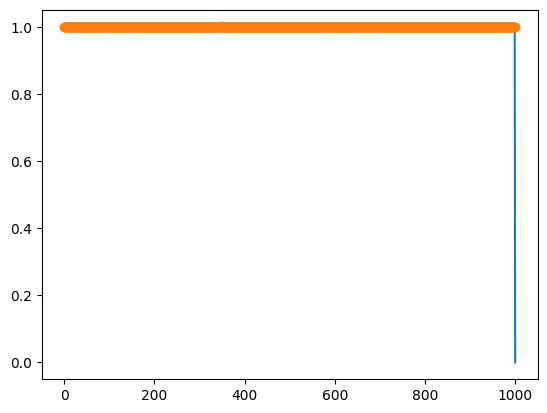

In [7]:
plt.plot(data['repump_repump_laser'])
plt.plot(data['repump_repump_read'], 'o')

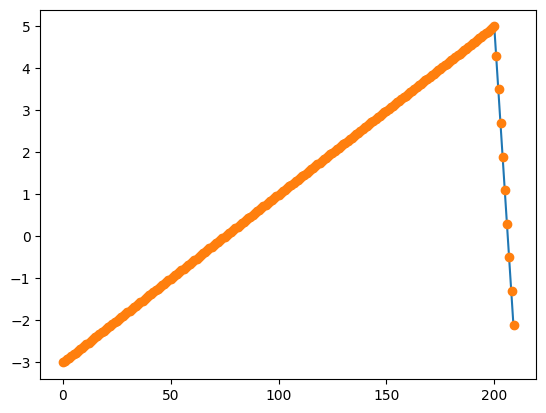

In [8]:
plt.plot(data['scan_laser'])
plt.plot(data['photodiode'], 'o')